In [6]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

OPENAQ_API_KEY = os.getenv("OPENAQ_API_KEY")



In [7]:
import requests

url = "https://api.openaq.org/v3/sensors/5077866/measurements"
headers = {
    "X-API-Key": OPENAQ_API_KEY
}

response = requests.get(url, headers=headers)


In [8]:
data = response.json()
data = data.get("results", [])
if not data:
    print("No data found for the specified sensor.")

In [14]:
data

[{'value': 7.0,
  'flagInfo': {'hasFlags': False},
  'parameter': {'id': 2,
   'name': 'pm25',
   'units': 'µg/m³',
   'displayName': None},
  'period': {'label': 'raw',
   'interval': '01:00:00',
   'datetimeFrom': {'utc': '2022-10-04T17:00:00Z',
    'local': '2022-10-04T13:00:00-04:00'},
   'datetimeTo': {'utc': '2022-10-04T18:00:00Z',
    'local': '2022-10-04T14:00:00-04:00'}},
  'coordinates': None,
  'summary': None,
  'coverage': {'expectedCount': 1,
   'expectedInterval': '01:00:00',
   'observedCount': 1,
   'observedInterval': '01:00:00',
   'percentComplete': 100.0,
   'percentCoverage': 100.0,
   'datetimeFrom': {'utc': '2022-10-04T17:00:00Z',
    'local': '2022-10-04T13:00:00-04:00'},
   'datetimeTo': {'utc': '2022-10-04T18:00:00Z',
    'local': '2022-10-04T14:00:00-04:00'}}},
 {'value': 7.0,
  'flagInfo': {'hasFlags': False},
  'parameter': {'id': 2,
   'name': 'pm25',
   'units': 'µg/m³',
   'displayName': None},
  'period': {'label': 'raw',
   'interval': '01:00:00',
   

In [9]:
cleaned = []
for point in data:
    cleaned.append({
        "value": point["value"],
        "datefrom": point["period"]["datetimeFrom"],
        "dateto": point["period"]["datetimeTo"]
    })

In [24]:
cleaned


[{'value': 7.0,
  'datefrom': {'utc': '2022-10-04T17:00:00Z',
   'local': '2022-10-04T13:00:00-04:00'},
  'dateto': {'utc': '2022-10-04T18:00:00Z',
   'local': '2022-10-04T14:00:00-04:00'}},
 {'value': 7.0,
  'datefrom': {'utc': '2022-10-04T18:00:00Z',
   'local': '2022-10-04T14:00:00-04:00'},
  'dateto': {'utc': '2022-10-04T19:00:00Z',
   'local': '2022-10-04T15:00:00-04:00'}},
 {'value': 6.0,
  'datefrom': {'utc': '2023-05-07T00:00:00Z',
   'local': '2023-05-06T20:00:00-04:00'},
  'dateto': {'utc': '2023-05-07T01:00:00Z',
   'local': '2023-05-06T21:00:00-04:00'}},
 {'value': 10.0,
  'datefrom': {'utc': '2023-05-07T01:00:00Z',
   'local': '2023-05-06T21:00:00-04:00'},
  'dateto': {'utc': '2023-05-07T02:00:00Z',
   'local': '2023-05-06T22:00:00-04:00'}},
 {'value': 12.0,
  'datefrom': {'utc': '2023-05-07T02:00:00Z',
   'local': '2023-05-06T22:00:00-04:00'},
  'dateto': {'utc': '2023-05-07T03:00:00Z',
   'local': '2023-05-06T23:00:00-04:00'}},
 {'value': 10.0,
  'datefrom': {'utc': '202

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame([
    {"date": pd.to_datetime(point["datefrom"]["utc"]), "value": point["value"]}
    for point in cleaned
])

# Sort by date
df = df.sort_values("date").iloc[2:]  



In [11]:
df

,date,value
2,2023-05-07 00:00:00+00:00,6.0
3,2023-05-07 01:00:00+00:00,10.0
4,2023-05-07 02:00:00+00:00,12.0
5,2023-05-07 03:00:00+00:00,10.0
6,2023-05-07 04:00:00+00:00,12.0
...,...,...
95,2023-05-10 23:00:00+00:00,9.0
96,2023-05-11 00:00:00+00:00,8.0
97,2023-05-11 01:00:00+00:00,12.0
98,2023-05-11 02:00:00+00:00,13.0


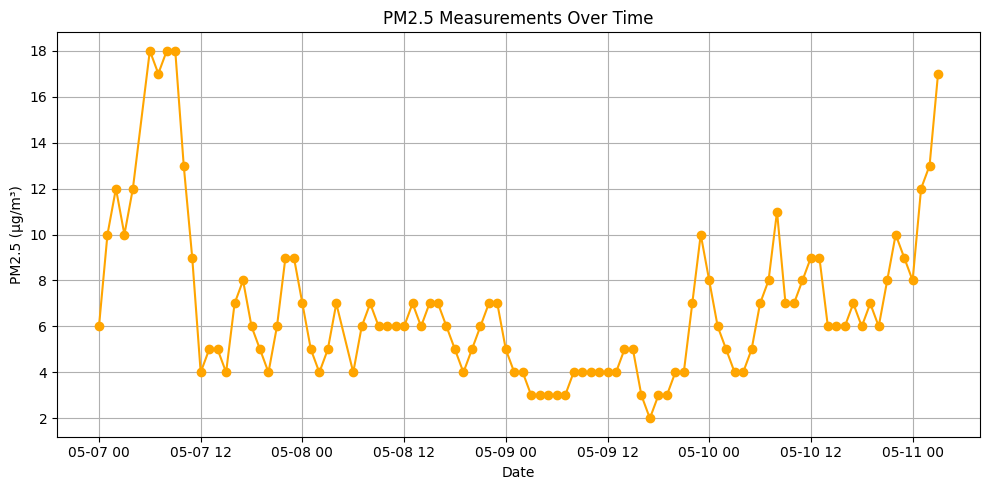

In [12]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["value"], marker='o', color='orange')
plt.title("PM2.5 Measurements Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
from pathlib import Path
import pandas as pd

# Point to data directory (relative to notebooks/)
data_dir = Path("../data/2023-2024")

# Find all CSV or CSV.GZ files recursively
files = list(data_dir.rglob("*.csv.gz"))
if not files:
    files = list(data_dir.rglob("*.csv"))

print(f"Found {len(files)} file(s)")
print("Example file:", files[0] if files else "None found")

# Read & combine
if files:
    df = pd.concat(
        (pd.read_csv(f, compression="infer") for f in files),
        ignore_index=True
    )
    print(f"Loaded {len(df)} rows from {len(files)} files")
    display(df.head())
else:
    raise FileNotFoundError("No data files found in ../data/")


Found 294 file(s)
Example file: ../data/2023-2024/month=03/location-7570-20230323.csv.gz
Loaded 23776 rows from 294 files


,location_id,sensors_id,location,datetime,lat,lon,parameter,units,value
0,7570,21959,Toronto Downtown-7570,2023-03-23T01:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,17.0
1,7570,21959,Toronto Downtown-7570,2023-03-23T02:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,15.0
2,7570,21959,Toronto Downtown-7570,2023-03-23T03:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,15.0
3,7570,21959,Toronto Downtown-7570,2023-03-23T04:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,18.0
4,7570,21959,Toronto Downtown-7570,2023-03-23T05:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,27.0


In [14]:
from pathlib import Path
import pandas as pd

# Point to main data directory
data_dir = Path("../data")

# Find all CSV or CSV.GZ files recursively in all subfolders
files = list(data_dir.rglob("*.csv.gz")) + list(data_dir.rglob("*.csv"))

print(f"Found {len(files)} file(s)")
print("Example file:", files[0] if files else "None found")

# Read & append to existing df
if files:
    df_new = pd.concat(
        (pd.read_csv(f, compression="infer") for f in files),
        ignore_index=True
    )
    
    # Append to existing df if it exists
    try:
        df = pd.concat([df, df_new], ignore_index=True)
    except NameError:
        df = df_new  # If df doesn't exist yet, just assign it

    print(f"Loaded {len(df)} rows from {len(files)} files")
    display(df.head())
else:
    raise FileNotFoundError("No data files found in ../data/")


Found 1200 file(s)
Example file: ../data/2023-2024/month=03/location-7570-20230323.csv.gz
Loaded 80696 rows from 1200 files


,location_id,sensors_id,location,datetime,lat,lon,parameter,units,value
0,7570,21959,Toronto Downtown-7570,2023-03-23T01:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,17.0
1,7570,21959,Toronto Downtown-7570,2023-03-23T02:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,15.0
2,7570,21959,Toronto Downtown-7570,2023-03-23T03:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,15.0
3,7570,21959,Toronto Downtown-7570,2023-03-23T04:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,18.0
4,7570,21959,Toronto Downtown-7570,2023-03-23T05:00:00-01:00,43.64543,-79.38908,pm25,µg/m³,27.0


In [15]:
# Start from your df with "date" (UTC) and "value" as numeric
df = df[df["parameter"] == "pm25"].copy()
df = df.sort_values("datetime")
df["date"]  = pd.to_datetime(df["datetime"], utc=True, errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df = df[["date", "value"]].dropna(subset=["date"]).sort_values("date")

# Hourly resample (observed hourly mean)
hourly_obs = (
    df.set_index("date")["value"]
      .resample("1H")
      .mean()
)

# Interpolate only small gaps (e.g., up to 12 hours)
hourly_fill = hourly_obs.interpolate(method="time", limit=48, limit_direction="both")

# Flag which timestamps were filled (were NaN before, not NaN after)
is_interpolated = hourly_obs.isna() & hourly_fill.notna()

# 24-hour rolling mean on the filled series
roll24 = hourly_fill.rolling("24H", min_periods=6).mean()

# Combine back into a single DataFrame
df_hourly = (
    pd.DataFrame({
        "date": hourly_fill.index,
        "value_obs": hourly_obs.values,          # NaN where no observation
        "value_filled": hourly_fill.values,      # Observed or interpolated
        "is_interpolated": is_interpolated.values,
        "roll24": roll24.values
    })
    .sort_values("date")
)

# If you want this to be your working df:
df = df_hourly


/var/folders/82/xmj2bw09363_znn4vndq20j40000gn/T/ipykernel_26754/3340192907.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("1H")
/var/folders/82/xmj2bw09363_znn4vndq20j40000gn/T/ipykernel_26754/3340192907.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  roll24 = hourly_fill.rolling("24H", min_periods=6).mean()


In [16]:
df

,date,value_obs,value_filled,is_interpolated,roll24
0,2020-04-06 18:00:00+00:00,1.0,1.0,False,NaN
1,2020-04-06 19:00:00+00:00,2.0,2.0,False,NaN
2,2020-04-06 20:00:00+00:00,2.0,2.0,False,NaN
3,2020-04-06 21:00:00+00:00,2.0,2.0,False,NaN
4,2020-04-06 22:00:00+00:00,3.0,3.0,False,NaN
...,...,...,...,...,...
32740,2023-12-31 22:00:00+00:00,3.0,3.0,False,5.270833
32741,2023-12-31 23:00:00+00:00,3.0,3.0,False,5.020833
32742,2024-01-01 00:00:00+00:00,3.0,3.0,False,4.854167
32743,2024-01-01 01:00:00+00:00,3.0,3.0,False,4.645833


In [17]:
df

,date,value_obs,value_filled,is_interpolated,roll24
0,2020-04-06 18:00:00+00:00,1.0,1.0,False,NaN
1,2020-04-06 19:00:00+00:00,2.0,2.0,False,NaN
2,2020-04-06 20:00:00+00:00,2.0,2.0,False,NaN
3,2020-04-06 21:00:00+00:00,2.0,2.0,False,NaN
4,2020-04-06 22:00:00+00:00,3.0,3.0,False,NaN
...,...,...,...,...,...
32740,2023-12-31 22:00:00+00:00,3.0,3.0,False,5.270833
32741,2023-12-31 23:00:00+00:00,3.0,3.0,False,5.020833
32742,2024-01-01 00:00:00+00:00,3.0,3.0,False,4.854167
32743,2024-01-01 01:00:00+00:00,3.0,3.0,False,4.645833


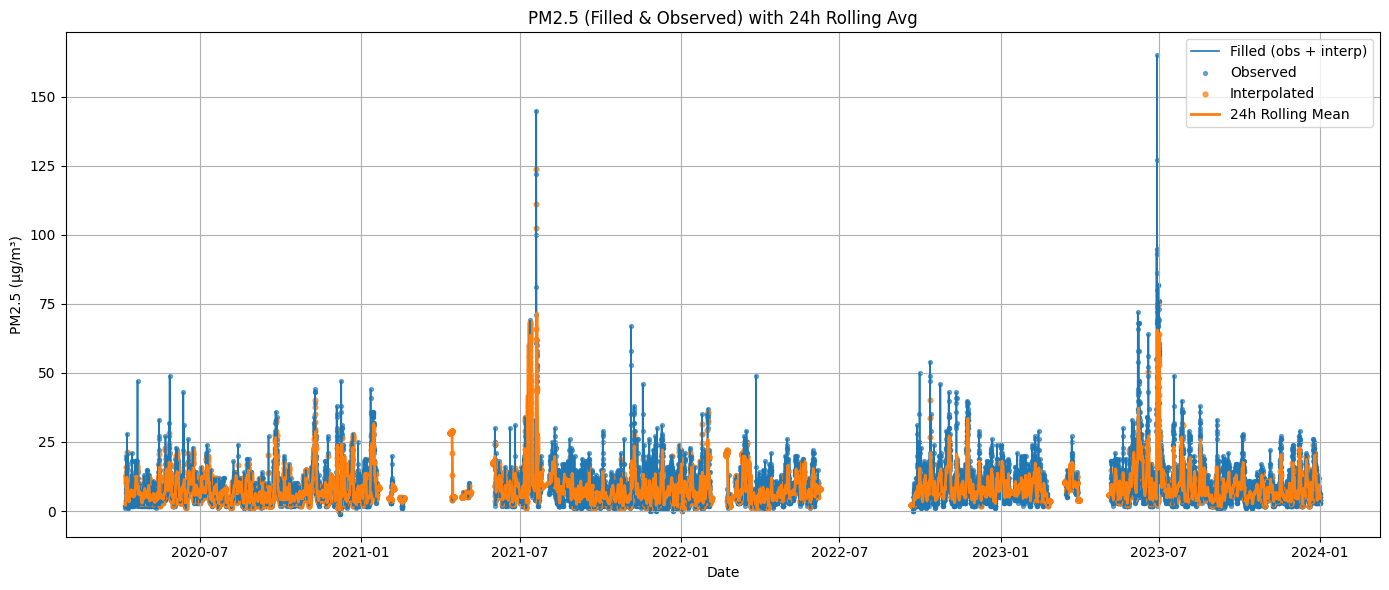

In [18]:
# make sure it's sorted
df = df.sort_values("date")

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# 1) Continuous line with gaps filled (observed + interpolated)
plt.plot(
    df["date"], df["value_filled"],
    linewidth=1.2, label="Filled (obs + interp)"
)

# 2) Mark observed points (optional)
plt.scatter(
    df.loc[~df["is_interpolated"], "date"],
    df.loc[~df["is_interpolated"], "value_obs"],
    s=8, alpha=0.6, label="Observed"
)

# 3) Mark interpolated points (optional)
plt.scatter(
    df.loc[df["is_interpolated"], "date"],
    df.loc[df["is_interpolated"], "value_filled"],
    s=12, alpha=0.7, label="Interpolated"
)

# 4) Rolling mean
plt.plot(df["date"], df["roll24"], linewidth=2, label="24h Rolling Mean")

plt.title("PM2.5 (Filled & Observed) with 24h Rolling Avg")
plt.xlabel("Date"); plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


In [117]:
df

,date,value_obs,value_filled,is_interpolated,roll24
0,2020-04-06 18:00:00+00:00,1.0,1.0,False,NaN
1,2020-04-06 19:00:00+00:00,2.0,2.0,False,NaN
2,2020-04-06 20:00:00+00:00,2.0,2.0,False,NaN
3,2020-04-06 21:00:00+00:00,2.0,2.0,False,NaN
4,2020-04-06 22:00:00+00:00,3.0,3.0,False,NaN
...,...,...,...,...,...
32740,2023-12-31 22:00:00+00:00,3.0,3.0,False,5.270833
32741,2023-12-31 23:00:00+00:00,3.0,3.0,False,5.020833
32742,2024-01-01 00:00:00+00:00,3.0,3.0,False,4.854167
32743,2024-01-01 01:00:00+00:00,3.0,3.0,False,4.645833


In [119]:
df

,date,value_obs,value_filled,is_interpolated,roll24
0,2020-04-06 18:00:00+00:00,1.0,1.0,False,NaN
1,2020-04-06 19:00:00+00:00,2.0,2.0,False,NaN
2,2020-04-06 20:00:00+00:00,2.0,2.0,False,NaN
3,2020-04-06 21:00:00+00:00,2.0,2.0,False,NaN
4,2020-04-06 22:00:00+00:00,3.0,3.0,False,NaN
...,...,...,...,...,...
32740,2023-12-31 22:00:00+00:00,3.0,3.0,False,5.270833
32741,2023-12-31 23:00:00+00:00,3.0,3.0,False,5.020833
32742,2024-01-01 00:00:00+00:00,3.0,3.0,False,4.854167
32743,2024-01-01 01:00:00+00:00,3.0,3.0,False,4.645833


/Users/oliverkwun-morfitt/Documents/GitHub/DeepAQ-System/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:04:48 - cmdstanpy - INFO - Chain [1] start processing
14:04:57 - cmdstanpy - INFO - Chain [1] done processing
/Users/oliverkwun-morfitt/Documents/GitHub/DeepAQ-System/.venv/lib/python3.13/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


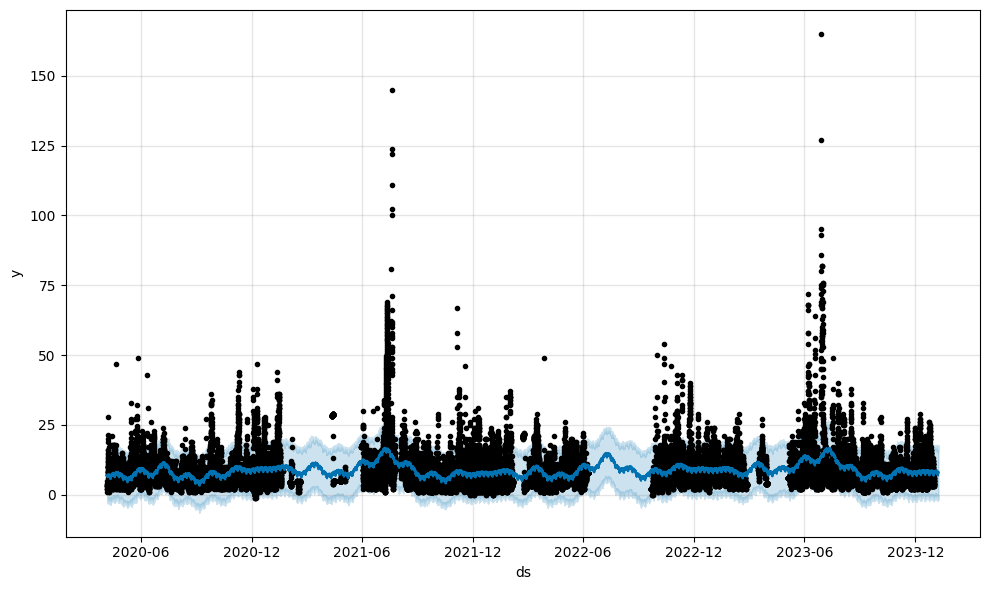

In [19]:
from prophet import Prophet
import pandas as pd

df_prophet = df[['date', 'value_filled']].copy()
df_prophet['date'] = df_prophet['date'].dt.tz_localize(None)  # Drop timezone
df_prophet = df_prophet.rename(columns={'date': 'ds', 'value_filled': 'y'})


df_prophet.dropna() 


model = Prophet(yearly_seasonality=True, daily_seasonality=True)

model.fit(df_prophet)

# Make future dataframe (forecast next 7 days hourly)
future = model.make_future_dataframe(periods=24*7, freq='H')
forecast = model.predict(future)

# Plot
fig1 = model.plot(forecast)
plt.show()


/Users/oliverkwun-morfitt/Documents/GitHub/DeepAQ-System/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/oliverkwun-morfitt/Documents/GitHub/DeepAQ-System/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/oliverkwun-morfitt/Documents/GitHub/DeepAQ-System/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


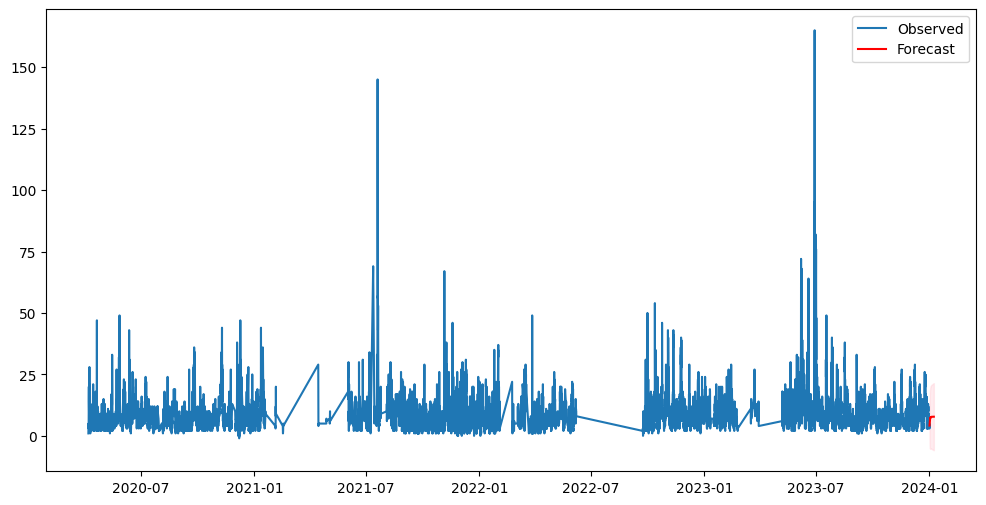

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Use continuous series for SARIMAX
series = pd.Series(df['value_filled'].values, index=pd.DatetimeIndex(df['date']))

# Fill NaN (SARIMAX doesn't handle NaN well)
series = series.interpolate(limit_direction='both')

# Fit SARIMAX (tune orders for your data)
model = SARIMAX(series, order=(2,1,2), seasonal_order=(1,0,1,24))
results = model.fit()

# Forecast next 7 days (hourly)
forecast = results.get_forecast(steps=24*7)
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(series, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast", color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [23]:
print(model)


In [24]:
import pickle

# Save fitted model
with open("sarimax_results.pkl", "wb") as pkl:
    pickle.dump(results, pkl)
